In [ ]:
# Import Libraries and Load Datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the datasets 'cheese_data.csv' and 'canada_weather.csv'.
try:
    cheese_df = pd.read_csv('cheese_data.csv')
    weather_df = pd.read_csv('canada_weather.csv')
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("Error: Check if 'cheese_data.csv' and 'canada_weather.csv' are uploaded or not.")
    exit()

print("Cheese Data Head:")
print(cheese_df.head())
print("\nWeather Data Head:")
print(weather_df.head())
print("\nCheese Data Info:")
print(cheese_df.info())
print("\nWeather Data Info:")
print(weather_df.info())

Datasets loaded successfully!
Cheese Data Head:
   CheeseId ManufacturerProvCode ManufacturingTypeEn  MoisturePercent  \
0       228                   NB           Farmstead             47.0   
1       242                   NB           Farmstead             47.9   
2       301                   ON          Industrial             54.0   
3       303                   NB           Farmstead             47.0   
4       319                   NB           Farmstead             49.4   

                                          FlavourEn  \
0                                     Sharp, lactic   
1                Sharp, lactic, lightly caramelized   
2                           Mild, tangy, and fruity   
3  Sharp with fruity notes and a hint of wild honey   
4                                      Softer taste   

                                   CharacteristicsEn  Organic  \
0                                           Uncooked        0   
1                                           Uncooked

In [ ]:
# Cleaning and Preparing the Weather Data

# Function to extract Celsius temperature
def extract_celsius(temp_str):
    if isinstance(temp_str, str):
        match = re.search(r'([−-]?\d+\.?\d*)', temp_str)
        if match:
            return float(match.group(1).replace('−', '-'))
    return None

# Converting relevant temperature columns to Celsius floats
weather_df['January_Avg_High_C'] = weather_df['January(Avg. high °C (°F))'].apply(extract_celsius)
weather_df['January_Avg_Low_C'] = weather_df['January(Avg. low °C (°F))'].apply(extract_celsius)
weather_df['July_Avg_High_C'] = weather_df['July(Avg. high °C (°F))'].apply(extract_celsius)
weather_df['July_Avg_Low_C'] = weather_df['July(Avg. low °C (°F))'].apply(extract_celsius)
weather_df['Annual_Avg_High_C'] = weather_df['Annual(Avg. high °C (°F))'].apply(extract_celsius)
weather_df['Annual_Avg_Low_C'] = weather_df['Annual(Avg. low °C (°F))'].apply(extract_celsius)

# Calculating Annual Average Temperature as the mean of annual high and low values
weather_df['Annual_Avg_Temp_C'] = (weather_df['Annual_Avg_High_C'] + weather_df['Annual_Avg_Low_C']) / 2

# Extracting Province Code from 'Community' column
weather_df['ProvinceCode'] = weather_df['Community'].apply(lambda x: x.split(', ')[-1].upper() if ', ' in x else None)

# Selecting cleaned and derived columns for weather DataFrame
weather_df_cleaned = weather_df[['ProvinceCode', 'January_Avg_High_C', 'January_Avg_Low_C',
                                 'July_Avg_High_C', 'July_Avg_Low_C', 'Annual_Avg_High_C',
                                 'Annual_Avg_Low_C', 'Annual_Avg_Temp_C']].copy()

# Drop any rows where ProvinceCode couldn't be extracted
weather_df_cleaned.dropna(subset=['ProvinceCode'], inplace=True)

print("\n Cleaned Weather Data Info & Head ")
print("Cleaned Weather Data Info:")
print(weather_df_cleaned.info())
print("\nCleaned Weather Data Head:")
print(weather_df_cleaned.head())

print("\nUnique Province Codes in Cheese Data (before merge):")
print(cheese_df['ManufacturerProvCode'].unique())
print("\nUnique Province Codes in Cleaned Weather Data (for merging):")
print(weather_df_cleaned['ProvinceCode'].unique())


 Cleaned Weather Data Info & Head 
Cleaned Weather Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProvinceCode        43 non-null     object 
 1   January_Avg_High_C  43 non-null     float64
 2   January_Avg_Low_C   43 non-null     float64
 3   July_Avg_High_C     43 non-null     float64
 4   July_Avg_Low_C      43 non-null     float64
 5   Annual_Avg_High_C   43 non-null     float64
 6   Annual_Avg_Low_C    43 non-null     float64
 7   Annual_Avg_Temp_C   43 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.8+ KB
None

Cleaned Weather Data Head:
  ProvinceCode  January_Avg_High_C  January_Avg_Low_C  July_Avg_High_C  \
0           PE                -3.9              -12.5             23.2   
1           NU               -27.7              -34.8             17.0   
2           QC                -8.7    

In [ ]:
# Merging Datasets

# Rename 'ManufacturerProvCode' to 'ProvinceCode'
cheese_df.rename(columns={'ManufacturerProvCode': 'ProvinceCode'}, inplace=True)

# Merging the dataframes based on 'ProvinceCode'.
merged_df = pd.merge(cheese_df, weather_df_cleaned, on='ProvinceCode', how='left')

print("\n--- Merged DataFrame Info & Head ---")
print("Merged DataFrame Info:")
print(merged_df.info())
print("\nMerged DataFrame Head:")
print(merged_df.head())


--- Merged DataFrame Info & Head ---
Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CheeseId             3371 non-null   int64  
 1   ProvinceCode         3371 non-null   object 
 2   ManufacturingTypeEn  3371 non-null   object 
 3   MoisturePercent      3316 non-null   float64
 4   FlavourEn            2547 non-null   object 
 5   CharacteristicsEn    2046 non-null   object 
 6   Organic              3371 non-null   int64  
 7   CategoryTypeEn       3296 non-null   object 
 8   MilkTypeEn           3368 non-null   object 
 9   MilkTreatmentTypeEn  3160 non-null   object 
 10  RindTypeEn           2243 non-null   object 
 11  CheeseName           3371 non-null   object 
 12  FatLevel             3371 non-null   object 
 13  January_Avg_High_C   3371 non-null   float64
 14  January_Avg_Low_C    3371 n

In [ ]:
# Data Analysis and Aggregation

# Grouping the merged DataFrame by ProvinceCode
# Calculating the count of cheeses and the mean of temperature columns
province_summary = merged_df.groupby('ProvinceCode').agg(
    Number_of_Cheeses=('CheeseId', 'count'), # Count unique CheeseIds per province
    Avg_Annual_Temp_C=('Annual_Avg_Temp_C', 'mean'),
    Avg_July_High_C=('July_Avg_High_C', 'mean'),
    Avg_January_Low_C=('January_Avg_Low_C', 'mean')
).reset_index()

province_summary_sorted = province_summary.sort_values(by='Number_of_Cheeses', ascending=False)

print("\n--- Province Summary (sorted by Number of Cheeses) ---")
print(province_summary_sorted)


--- Province Summary (sorted by Number of Cheeses) ---
  ProvinceCode  Number_of_Cheeses  Avg_Annual_Temp_C  Avg_July_High_C  \
8           QC               2388           4.200000        24.066667   
6           ON                460           6.550000        26.475000   
1           BC                325           7.150000        24.600000   
3           NB                 81           4.866667        24.966667   
0           AB                 39           2.533333        23.100000   
2           MB                 33          -2.116667        22.333333   
5           NS                 30           6.533333        22.600000   
4           NL                  6           2.566667        19.200000   
7           PE                  6           5.600000        23.433333   
9           SK                  3           1.933333        24.866667   

   Avg_January_Low_C  
8         -17.200000  
6         -13.625000  
1          -7.240000  
3         -15.833333  
0         -17.933333  
2 

<ipython-input-5-92198056b8f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProvinceCode', y='Number_of_Cheeses', data=province_summary_sorted, palette='viridis')


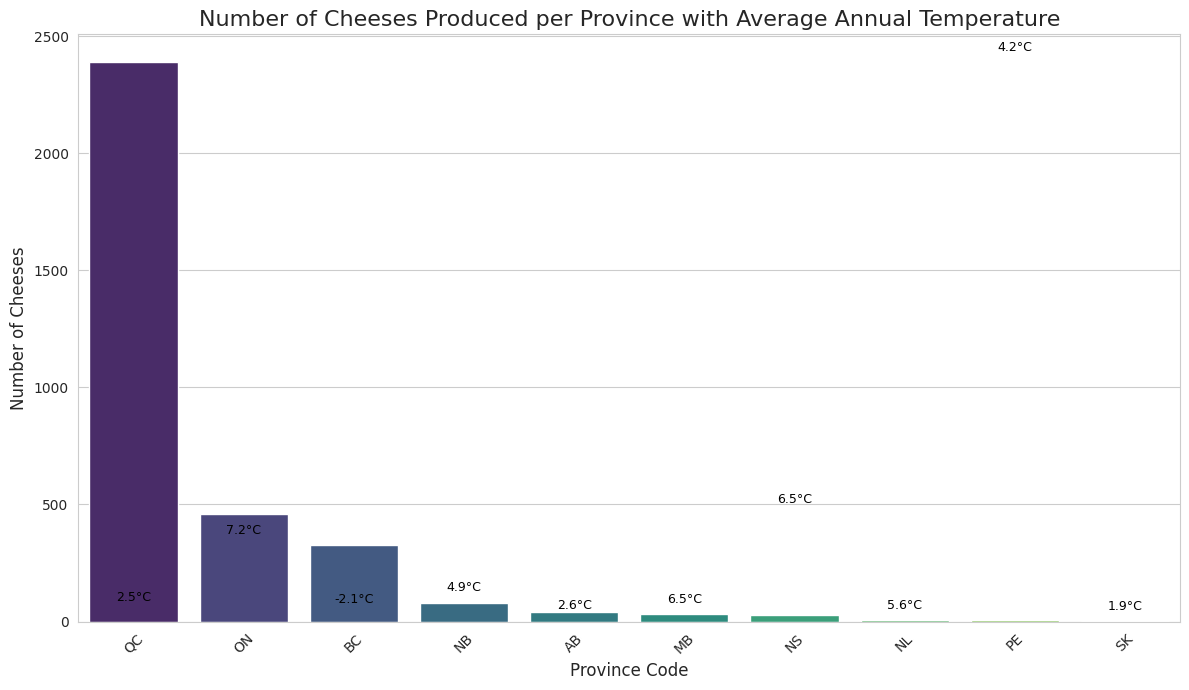

In [ ]:
# Visualisation of Bar chart of Number of Cheeses per Province

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))
sns.barplot(x='ProvinceCode', y='Number_of_Cheeses', data=province_summary_sorted, palette='viridis')

for index, row in province_summary_sorted.iterrows():
    plt.text(index, row['Number_of_Cheeses'] + (province_summary_sorted['Number_of_Cheeses'].max() * 0.02),
             f"{row['Avg_Annual_Temp_C']:.1f}°C",
             color='black', ha="center", fontsize=9)

plt.title('Number of Cheeses Produced per Province with Average Annual Temperature', fontsize=16)
plt.xlabel('Province Code', fontsize=12)
plt.ylabel('Number of Cheeses', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

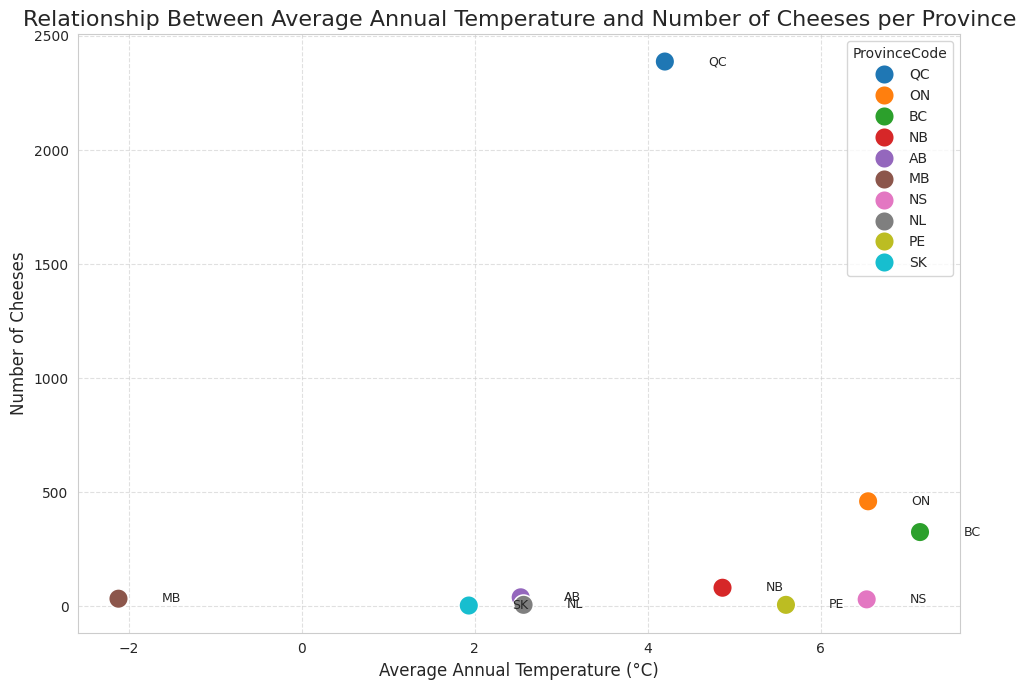

In [ ]:
# Visualization of Scatter plot of Average Annual Temperature vs. Number of Cheeses

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Avg_Annual_Temp_C', y='Number_of_Cheeses', data=province_summary_sorted,
                hue='ProvinceCode', s=200, palette='tab10', legend='full')

for i, row in province_summary_sorted.iterrows():
    plt.text(row['Avg_Annual_Temp_C'] + 0.5, row['Number_of_Cheeses'], row['ProvinceCode'],
             fontsize=9, ha='left', va='center')

plt.title('Relationship Between Average Annual Temperature and Number of Cheeses per Province', fontsize=16)
plt.xlabel('Average Annual Temperature (°C)', fontsize=12)
plt.ylabel('Number of Cheeses', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Data Analysis and Inferences:

The analysis of Canadian Cheese directory dataset alongwith weather data represents interesting patterns, particularly the relationship between climate and cheese production. First the dataset was explored and then datasets were merged based on 'ProvinceCode', combining cheese manufacturing details with annual, January and July temperatures for each province.

From the visualizations, it is evident that Quebec (QC) and Ontario (ON) are the dominant provinces in terms of cheese production. British Columbia (BC) trails as the third. This suggests that factors apart from temperature is affecting such as established dairy industries, culinary traditions, market demand, or higher concentration of cheese manufacturers.

About the relationship between weather and cheese production, there isnt a strong relation, direct correlation between a province's annual temperature and the sheer number of cheeses produced. While Quebec and Ontario with their good amount of cheese output, experience moderate average annual temperatures, other provinces with similar or higher average temperatures produce significantly fewer cheeses.Also provinces like Manitoba (MB) and Saskatchewan (SK) which have colder average annual temperatures, also produce fewer cheeses. This suggests that temperature isnt the primary factor of high cheese production. The cheese production distribution solely concentrated in the central and easter provinces.

A temperate climate, characterized by distinct seasons might be more historically conducive to dairy farming and cheese maturation processes that were developed over centuries in similar climates worldwide. While extreme cold might limit outdoor grazing for certain periods, modern farming practices and indoor facilities can mitigate these challenges. The presence of major dairy regions and a large agricultural base in provinces like Quebec and Ontario likely plays a more significant role in their high cheese output than temperature alone. The large number of cheese varieties in Quebec, especially, points to a rich cheese-making tradition and potentially a more diverse range of milk types or processing methods.

In conclusion, while there isn't a simple linear relationship, the data hints that a temperate climate, like those found in Quebec and Ontario, may align well with the traditional requirements for cheese production, alongside robust agricultural infrastructure and established culinary heritage. The distribution of cheese production in Canada is likely a complex interplay of climatic conditions, historical development of the dairy industry, economic factors, and cultural influences.